In [1]:
import os
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg
import numpy as np


In [2]:
dir=r'../input/100-bird-species/285 birds'
dir_list=os.listdir(dir)
print (dir_list)

['class_dict.csv', 'EfficientNetB3-birds-98.87.h5', 'one image to test', 'valid', 'test', 'images to test', 'Bird Species.csv', 'train']


In [5]:
def print_in_color(txt_msg,fore_tupple,back_tupple,):
    #prints the text_msg in the foreground color specified by fore_tupple with the background specified by back_tupple 
    #text_msg is the text, fore_tupple is foregroud color tupple (r,g,b), back_tupple is background tupple (r,g,b)
    rf,gf,bf=fore_tupple
    rb,gb,bb=back_tupple
    msg='{0}' + txt_msg
    mat='\33[38;2;' + str(rf) +';' + str(gf) + ';' + str(bf) + ';48;2;' + str(rb) + ';' +str(gb) + ';' + str(bb) +'m' 
    print(msg .format(mat))

In [6]:
train_dir=r'../input/100-bird-species/285 birds/train'
dir_list=os.listdir(train_dir)
msg='There are {0:4s} species in the dataset'.format(str(len(dir_list)))
print_in_color(msg, (0,255,0),(0,0,0))
msg='{0:8s}{1:4s}{2:^35s}{1:4s}{3:11s}{1:3s}{4:10s}{1:3s}{5:11s}{6}'
msg=msg.format('Class Id', ' ', 'Bird Species', 'Train Files','Test Files', 'Valid Files','\n')
print_in_color(msg, (255,0,0), (255,255,255))
species_list= sorted(os.listdir(train_dir))
train_sample_list=[]
for i, specie in enumerate (species_list):
    file_path=os.path.join(train_dir,specie)
    train_files_list=os.listdir(file_path)
    train_sample_list.append(len(train_files_list))
    train_file_count=str(len(train_files_list))
    msg='{0:^8s}{1:4s}{2:^35s}{1:4s}{3:^11s}{1:3s}{4:^10s}{1:3s}{5:^11s}'
    msg=msg.format(str(i), ' ',specie, train_file_count,'5', '5')
    toggle=i% 2   
    if toggle==0:
        back_color=(255,255,255)
    else:
        back_color=(191, 239, 242)
    print_in_color(msg, (0,0,0), back_color)
max_samples=np.max(train_sample_list)
max_specie=species_list[np.argmax(train_sample_list)]
min_specie=species_list[np.argmin(train_sample_list)]
print (max_specie, min_specie)
min_samples=np.min(train_sample_list)
msg='class {0:25s} has the most samples of {1:4s}'.format(max_specie, str(max_samples))
print_in_color(msg, (0,255,0), (0,0,0))
msg='class {0:25s} has the least samples of {1:4s}'.format(min_specie, str(min_samples))
print_in_color(msg, (0,255,0), (0,0,0))

There are 285  species in the dataset
Class Id               Bird Species                Train Files   Test Files   Valid Files

   0               AFRICAN CROWNED CRANE               137           5             5     
   1                 AFRICAN FIREFINCH                 140           5             5     
   2                     ALBATROSS                     133           5             5     
   3               ALEXANDRINE PARAKEET                165           5             5     
   4                  AMERICAN AVOCET                  179           5             5     
   5                 AMERICAN BITTERN                  170           5             5     
   6                   AMERICAN COOT                   158           5             5     
   7                AMERICAN GOLDFINCH                 133           5             5     
   8                 AMERICAN KESTREL                  130           5             5     
   9                  AMERICAN PIPIT                   179   

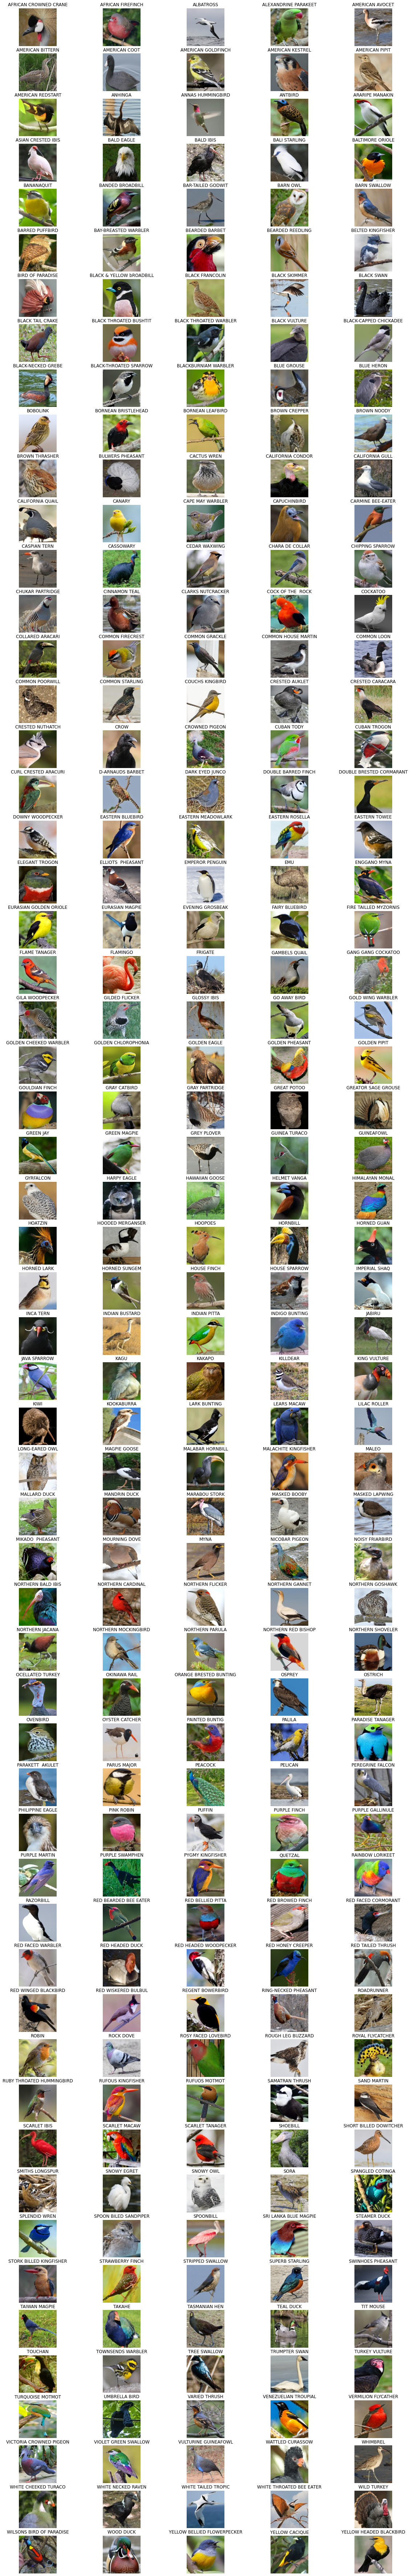

In [7]:
test_dir=r'../input/100-bird-species/285 birds/test'
classes=len(os.listdir(test_dir))
fig = plt.figure(figsize=(20,130))
if classes % 5==0:
    rows=int(classes/5)
else:
    rows=int(classes/5) +1
for row in range(rows):
    for column in range(5):
        i= row * 5 + column 
        if i>classes:
            break            
        specie=species_list[i]
        species_path=os.path.join(test_dir, specie)
        f_path=os.path.join(species_path, '1.jpg')        
        img = mpimg.imread(f_path)
        a = fig.add_subplot(rows, 5, i+1)
        imgplot=plt.imshow(img)
        a.axis("off")
        a.set_title(specie)	